<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/8thWeekTasks/Heart%20Failure%20SVM_Muhammad%20Raihan%20B_1103213077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 8 SVM

Dataset : heart_failure_clinical_records_dataset.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/f43f44cb-fdac-438d-b88d-f87e5dd2288b

# MOUNT GOOGLE DRIVE

In [54]:
from google.colab import drive

# Menghubungkan dengan Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORT LIBRARY

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATASET

In [56]:
# Ubah path sesuai dengan path di Google Drive
path = "/content/drive/My Drive/Dataset/heart_failure_clinical_records_dataset.csv"

# Baca dataset
df = pd.read_csv(path)

# Menampilkan dataset
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# DATASET ANALYSIS

In [57]:
# Menampilkan informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Prompt : Berikan kode untuk menampilkan statistik deskriptifnya

In [58]:
# Menampilkan statistik deskriptif dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Prompt : Berikan kode untuk menampilkan distribusi data masing-masing feature menggunakan histogram

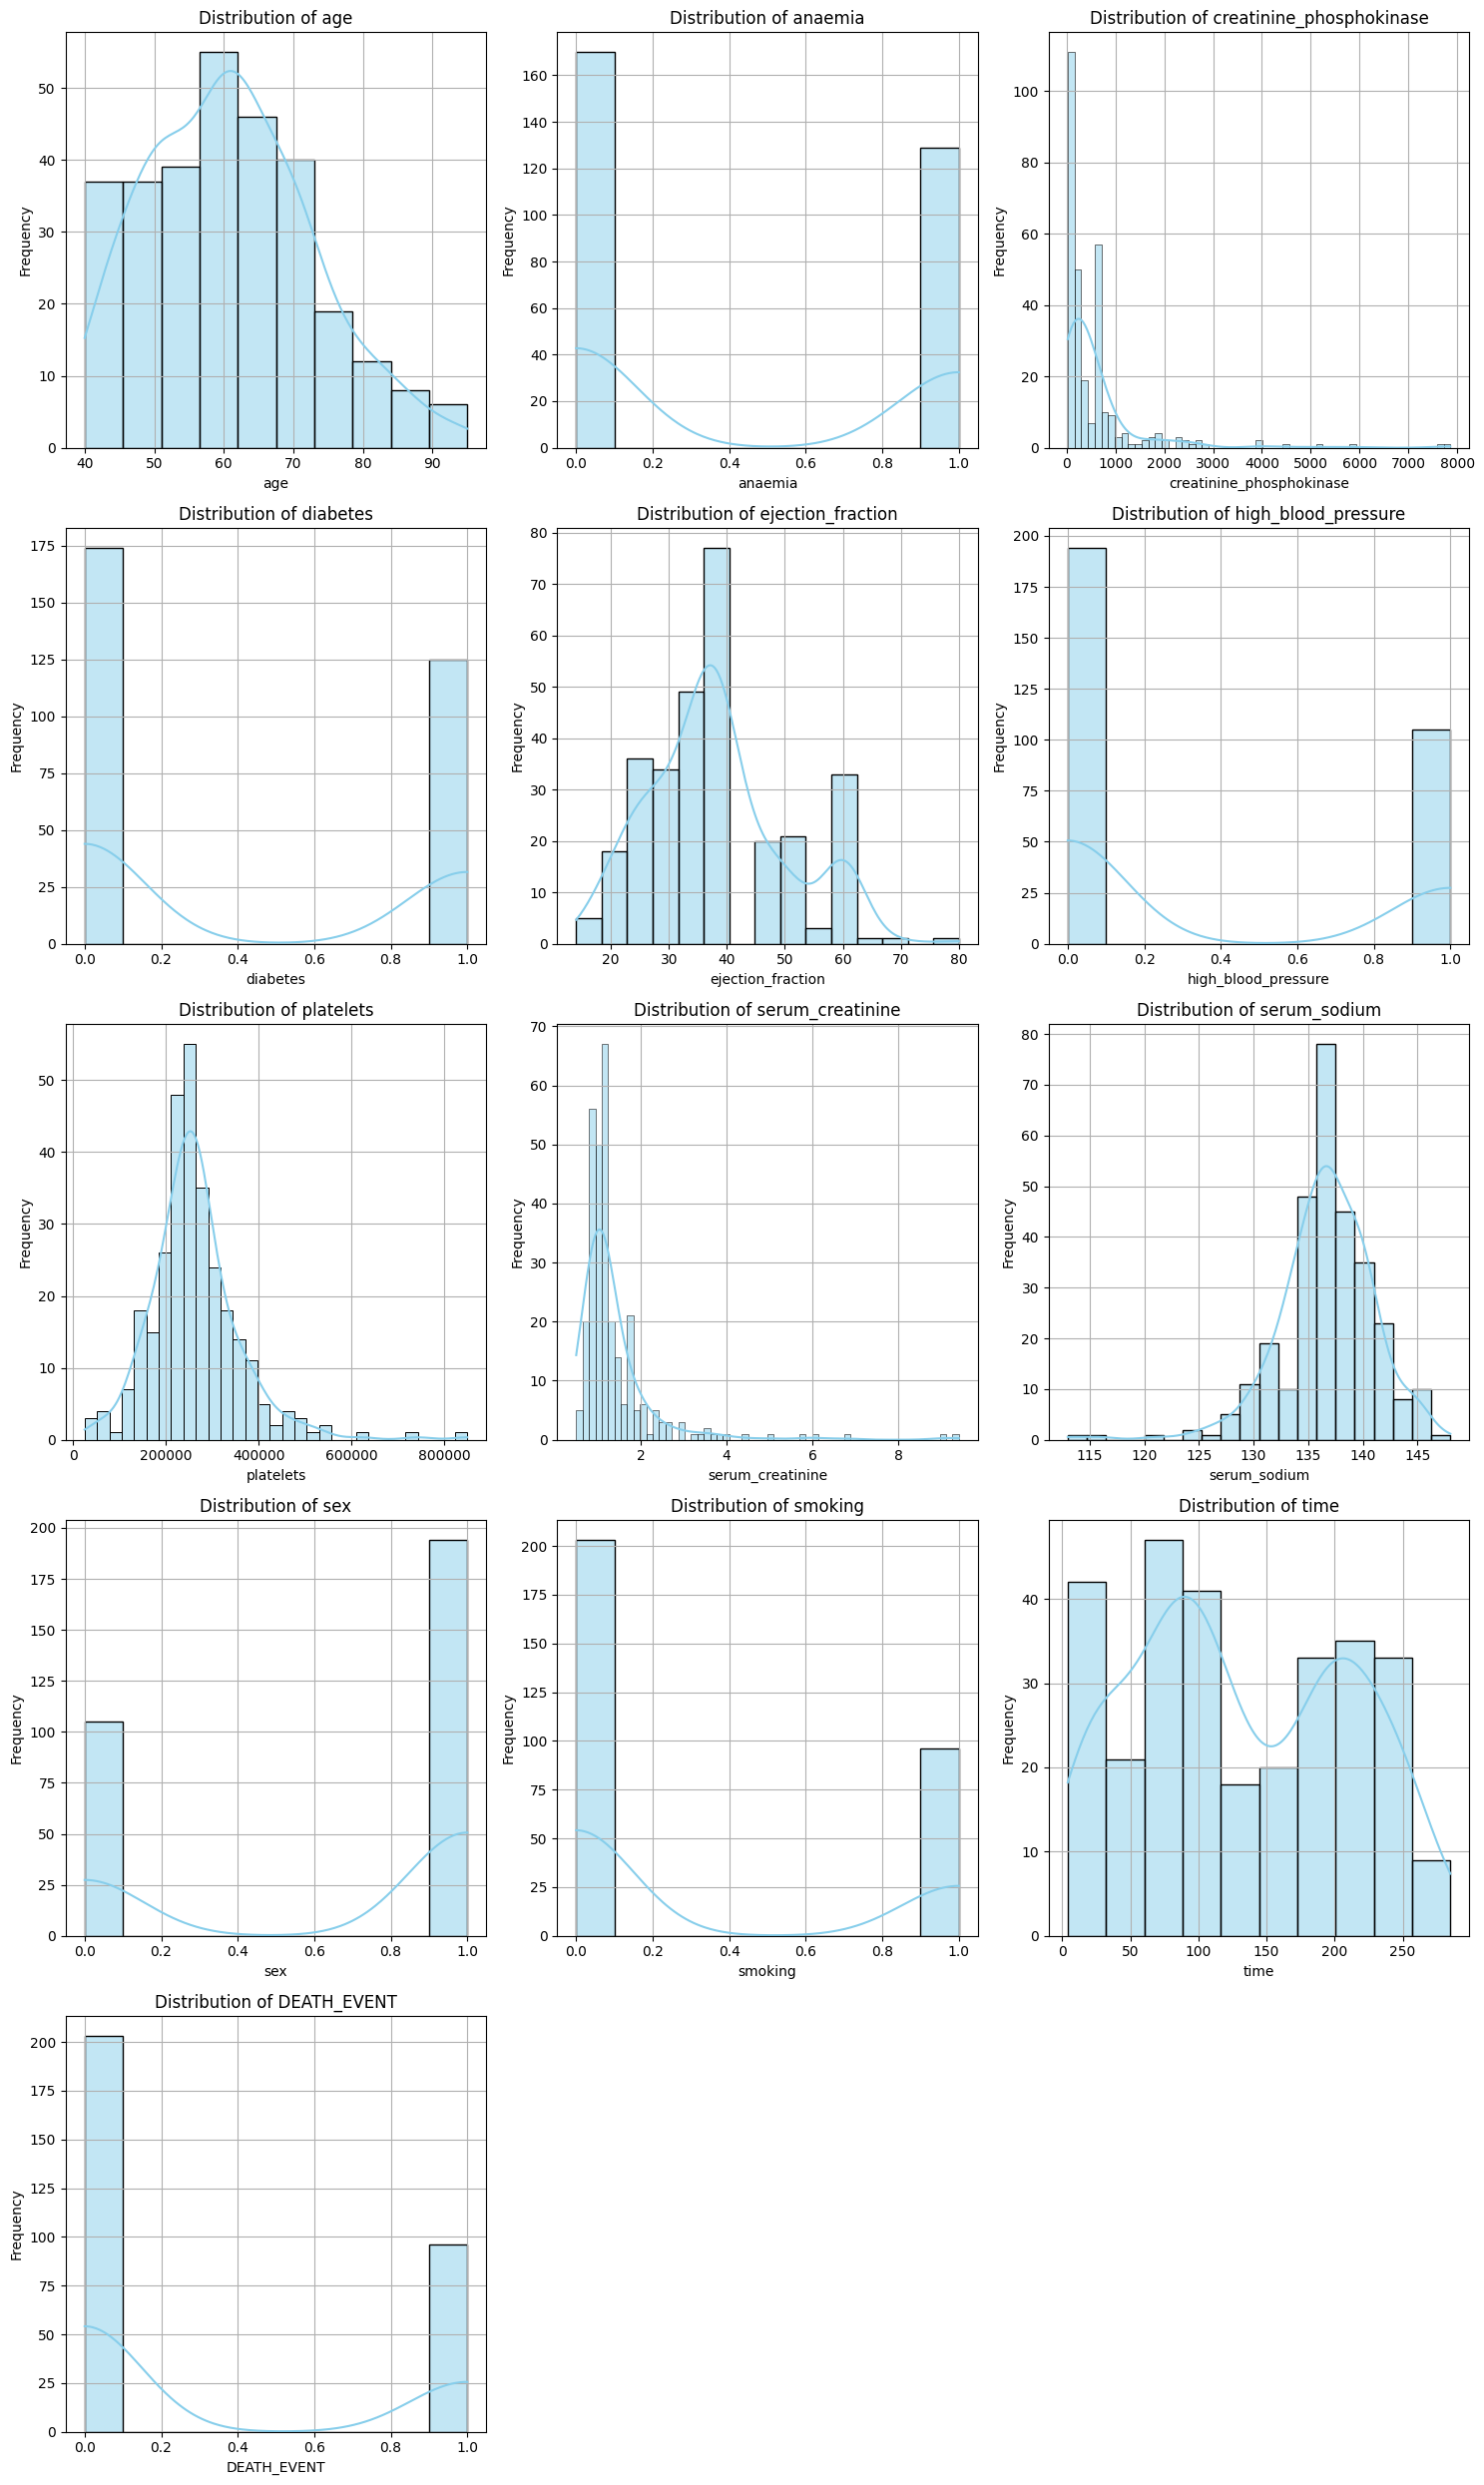

In [59]:
# Tampilkan distribusi data masing-masing fitur
def plot_feature_histograms(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 2) // 3  # Hitung jumlah baris
    plt.figure(figsize=(15, 5*num_rows))  # Sesuaikan ukuran gambar
    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.grid(True)
    plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
    plt.show()

# Panggil fungsi untuk menampilkan distribusi data
plot_feature_histograms(df)

Prompt : berikan kode untuk melihat korelasi antara fitur


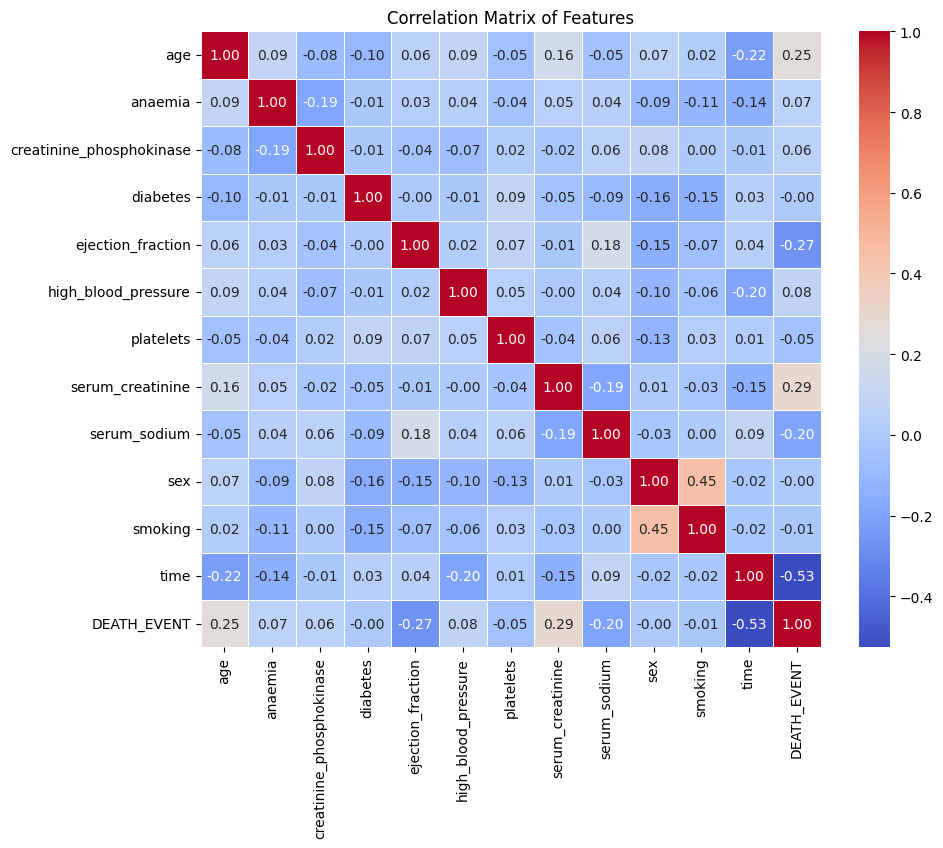

In [60]:
# Hitung matriks korelasi
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

Prompt : berikan kode untuk membagi dataset menjadi data uji dan data latih lalu buatkan model SVMnya serta evaluasi keakurasian hasilnya

In [61]:
# Menentukan fitur dan label
X = df.drop('DEATH_EVENT', axis=1)  # Fitur
y = df['DEATH_EVENT']              # Label

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Latih model SVM
svm_model.fit(X_train, y_train)

# Prediksi label untuk data uji
y_pred = svm_model.predict(X_test)

# Evaluasi keakuratan model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.75
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60

